In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
df = pd.read_csv("911.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.zip.value_counts(ascending=False).head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [7]:
df.twp.value_counts(ascending=False).head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [8]:
df.title.unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [9]:
df['Reason'] = df.title.apply(lambda x: x.split(":")[0])

In [10]:
df.Reason.value_counts(ascending=False)

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

In [11]:
df.groupby("Reason")['Reason'].count()

Reason
EMS        332692
Fire       100622
Traffic    230208
Name: Reason, dtype: int64

In [12]:
df.groupby("Reason").size()

Reason
EMS        332692
Fire       100622
Traffic    230208
dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

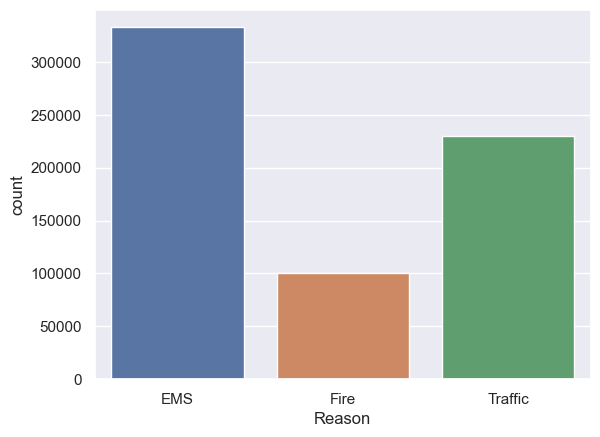

In [13]:
sns.countplot(data=df, x='Reason')

In [14]:
print(df.timeStamp.dtype)

object


In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
print(df.timeStamp.dtype)

datetime64[ns]


In [17]:
df.timeStamp.iloc[0].year

2015

In [18]:
df['Hour'] = df.timeStamp.apply(lambda x: x.hour)
df['Month'] = df.timeStamp.apply(lambda x: x.month)
df['Day_of_Week'] = df.timeStamp.apply(lambda x: x.day_of_week)

In [19]:
df.head()
df.Day_of_Week.unique()
df['Day_of_Week'].isna().sum()

0

In [20]:
days = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day_of_Week'] = df.Day_of_Week.map(days)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur


<Axes: xlabel='Day_of_Week', ylabel='count'>

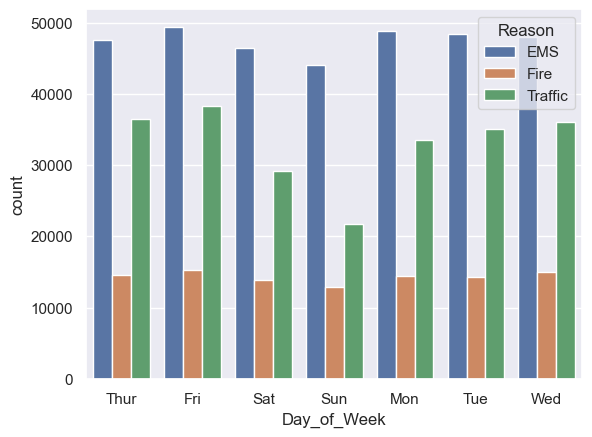

In [21]:
sns.countplot(data=df, x='Day_of_Week', hue='Reason')

In [22]:
byMonth = df.groupby("Month")['Month'].agg('count')

In [23]:
byMonth

Month
1     62336
2     55427
3     60027
4     53671
5     57509
6     60034
7     59832
8     48359
9     47213
10    51240
11    50182
12    57692
Name: Month, dtype: int64

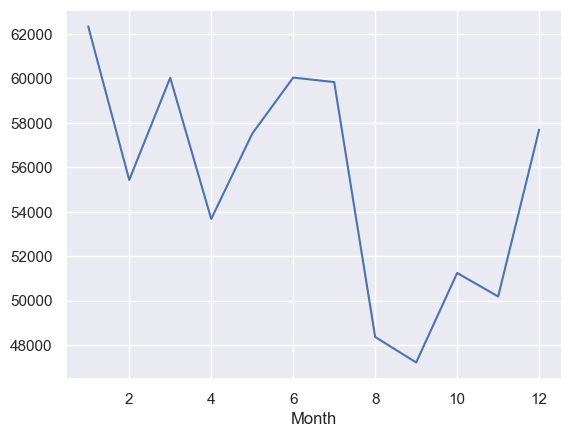

In [24]:
sns.lineplot(data=byMonth, x=byMonth.index, y=byMonth.values)
plt.show()

In [25]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,15,7,Wed,2020-07-29
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,15,7,Wed,2020-07-29
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,Wed,2020-07-29
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,Wed,2020-07-29


In [26]:
grouped_dates = df.groupby('Date')['Date'].agg('count')
grouped_dates

Date
2015-12-10    114
2015-12-11    391
2015-12-12    402
2015-12-13    316
2015-12-14    444
             ... 
2020-07-25    318
2020-07-26    296
2020-07-27    329
2020-07-28    370
2020-07-29    217
Name: Date, Length: 1694, dtype: int64

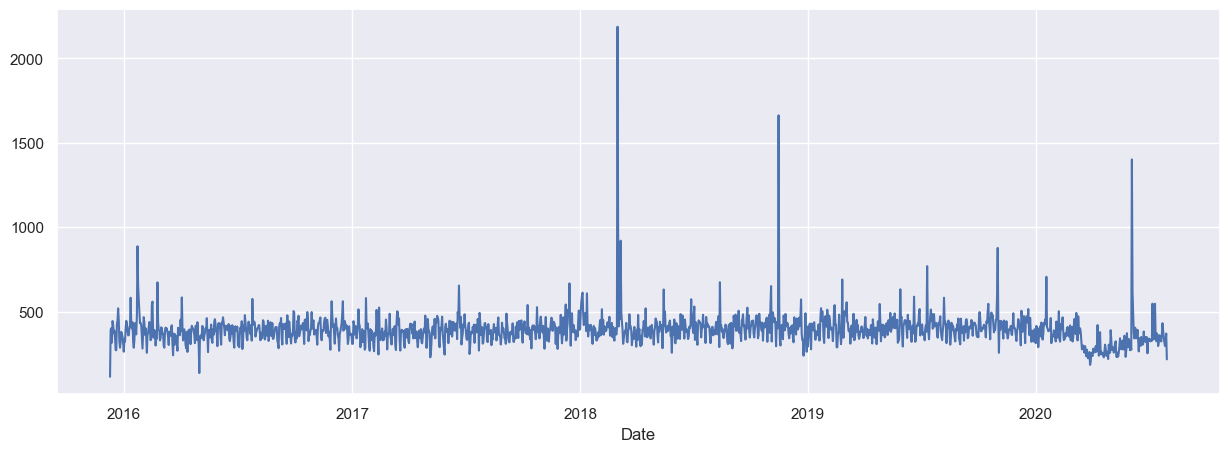

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(data=grouped_dates, x=grouped_dates.index, y=grouped_dates.values)
plt.show()

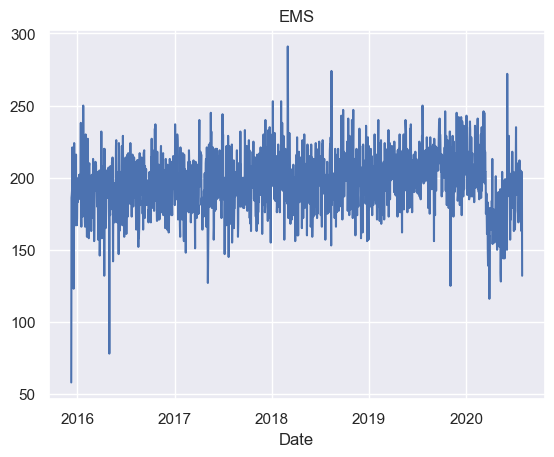

In [28]:
grouped_ems = df[df['Reason']=='EMS'].groupby('Date')['Date'].agg('count')
ax = sns.lineplot(data=grouped_ems, x=grouped_ems.index, y=grouped_ems.values)
ax.set_title("EMS")
plt.show()

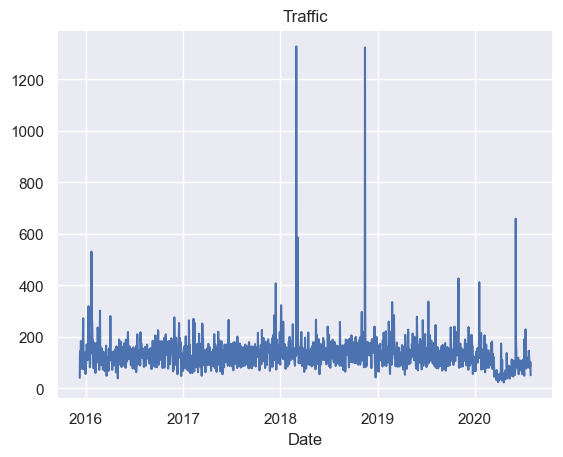

In [29]:
grouped_dates_traffic = df[df['Reason']=='Traffic'].groupby('Date')['Date'].agg('count')
ax = sns.lineplot(data=grouped_dates_traffic, x=grouped_dates_traffic.index, y=grouped_dates_traffic.values)
ax.set_title("Traffic")
plt.show()

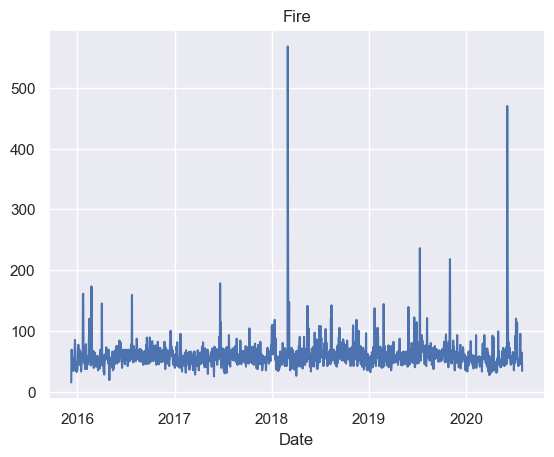

In [30]:
grouped_dates_fire = df[df['Reason']=='Fire'].groupby('Date')['Date'].agg('count')
ax = sns.lineplot(data=grouped_dates_fire, x=grouped_dates_fire.index, y=grouped_dates_fire.values)
ax.set_title("Fire")
plt.show()

In [31]:
# restructure data
df2 = df.groupby(['Day_of_Week', 'Hour'])[['Day_of_Week', 'Hour']].agg('count').unstack()['Day_of_Week']
df2

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thur,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


<Axes: xlabel='Hour', ylabel='Day_of_Week'>

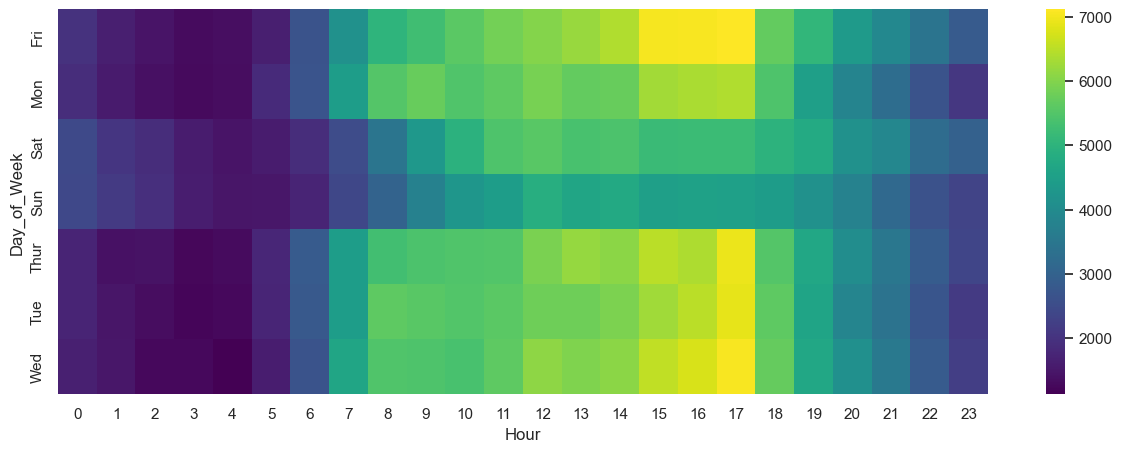

In [38]:
plt.figure(figsize=(15,5))
sns.heatmap(data=df2, cmap='viridis')

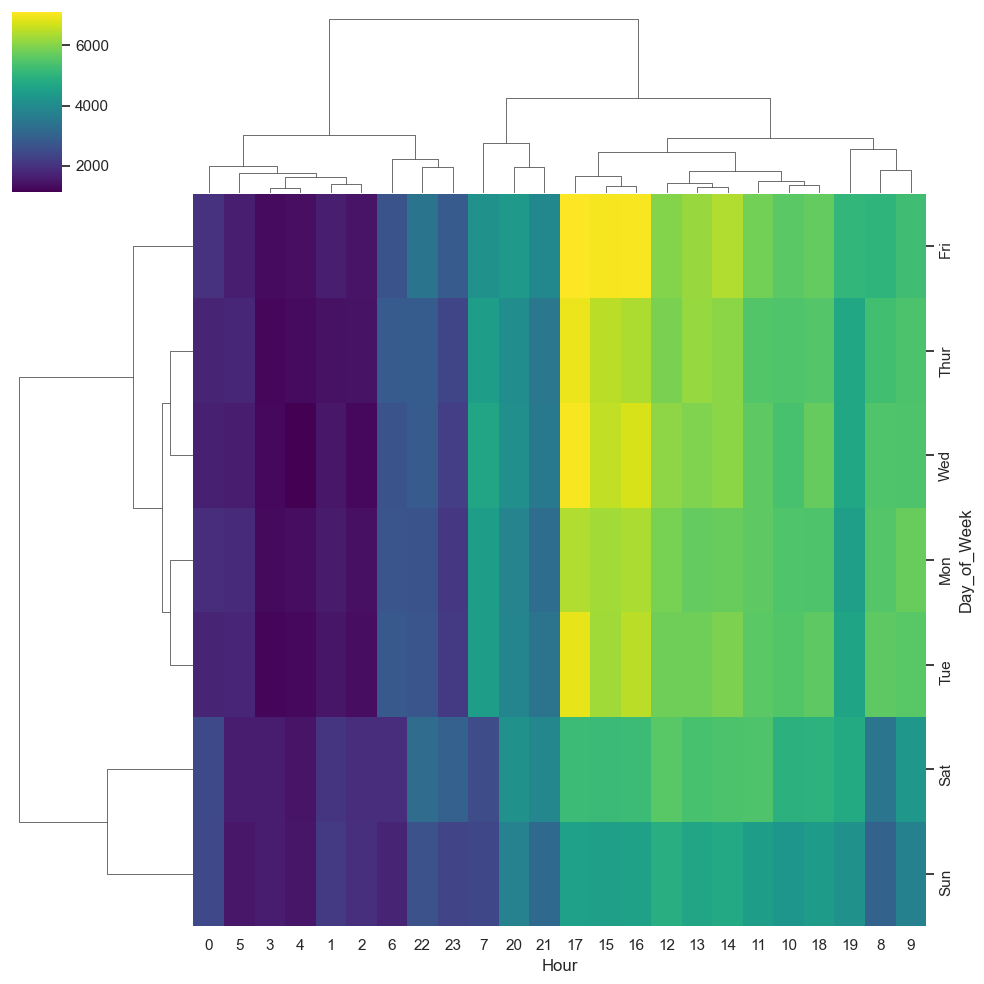

In [39]:
sns.clustermap(data=df2, cmap='viridis')

In [34]:
df3 = df.groupby(['Day_of_Week', 'Month'])[['Day_of_Week', 'Month']].agg('count').unstack()['Day_of_Week']
df3

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day_of_Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thur,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


<Axes: xlabel='Month', ylabel='Day_of_Week'>

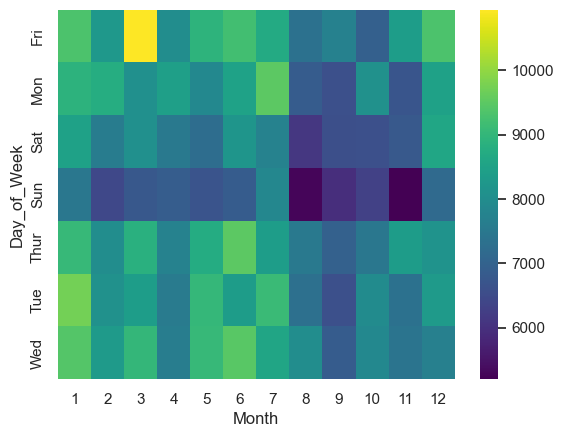

In [40]:
sns.heatmap(df3, cmap='viridis')

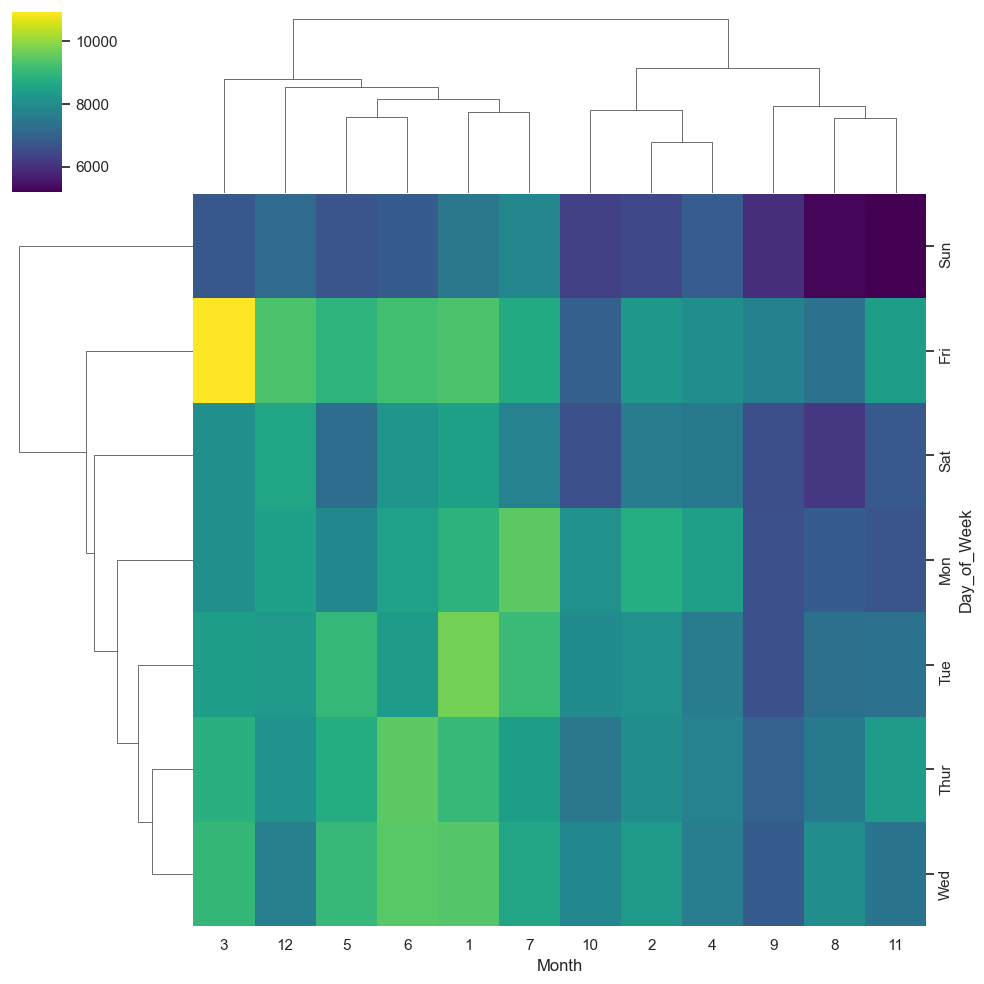

In [41]:
sns.clustermap(df3, cmap='viridis')